In [16]:
# let's get some 1 minute bar data using alphavantage.co
# register for an APIKEY at alphavantage.co
# NOTE: you must set outputsize = full in your url otherwise you get truncated data
# SOURCE: https://www.alphavantage.co/
import datetime
import pandas as pd
import io
import requests

# TODO: replace with your own API key
apikey = "VKN1S4903YECQ0X2"

def getDailyStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(columns = ['timestamp'])
    return symbol_df

# get minute stock prices
def getMinuteStockPrices(symbol):
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&interval=1min&outputsize=full&symbol='+symbol+'&apikey='+apikey+'&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    symbol_df = symbol_df.sort_values('timestamp', ascending=True)
    converted_timestamp = pd.to_datetime(symbol_df['timestamp'], infer_datetime_format=True)
    symbol_df.index = converted_timestamp
    symbol_df = symbol_df.drop(columns = ['timestamp'])
    return symbol_df

# get minute stock prices
def getLatestStockPrice(symbol):
    url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=' + symbol + '&apikey=' + apikey + '&datatype=csv'
    s = requests.get(url).content
    symbol_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    return symbol_df['price'].values[0]

bars = getDailyStockPrices('DAL')
bars.head();#remove selicolon to execute the command

In [17]:
#!pip install pandas_datareader;
#!pip install yfinance;
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from numpy import NaN, NAN,nan
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import *
import statsmodels.api as sm
import statsmodels.formula.api as smf


all_data={}
for column in ['AAL','ALK','AVH','CEA','ZNH','VLRS','CPA','DAL','GOL','LTM','UAL','WTI']:
    all_data[column]=yf.download(column, start = '2014-06-02', end='2016-06-13')
luvdf=pd.read_csv('LUV.csv')
luvdf['Date'] = pd.to_datetime(luvdf['Date'])
luvdf.index = luvdf['Date']
luvdf = luvdf.drop(columns = ['Date'])
luvdf = luvdf.iloc[21:]
all_data['LUV']=luvdf

# pd.set_option('display.max_columns', 10) 
# pd.set_option('display.max_rows', 100000)  
# pd.set_option('display.max_colwidth', -1)
# print(all_data['AAL'])
# print(all_data['LUV'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
dict1={ 'Date':np.array([k for k in all_data['LUV'].index])}
for column in ['AAL','ALK','AVH','CEA','ZNH','VLRS','CPA','DAL','GOL','LTM','UAL','WTI','LUV']:
    dict1[column]=np.array([k for k in all_data[column]['Adj Close']])
price = pd.DataFrame(dict1) 
price.index = price['Date']
price = price.drop(columns = ['Date'])

dict2={ 'Date':np.array([k for k in all_data['LUV'].index])}
for column in ['AAL','ALK','AVH','CEA','ZNH','VLRS','CPA','DAL','GOL','LTM','UAL','WTI','LUV']:
    dict2[column]=np.array([k for k in all_data[column]['Volume']])
volume = pd.DataFrame(dict2) 
volume.index = volume['Date']
volume = volume.drop(columns = ['Date'])

print(price);
volume

                  AAL        ALK        AVH        CEA        ZNH       VLRS  \
Date                                                                           
2014-06-02  39.003410  45.634613  12.858721  14.725806  13.302588   8.570000   
2014-06-03  39.211586  45.552528  12.709020  14.745043  13.503589   8.430000   
2014-06-04  40.517372  45.251553  12.842962  14.639240  13.293451   8.190000   
2014-06-05  40.129417  45.101059  12.898119  14.812371  13.375679   8.270000   
2014-06-06  41.520374  45.561657  13.016304  14.773897  13.348269   8.460000   
...               ...        ...        ...        ...        ...        ...   
2016-06-07  31.213644  61.984756   6.053238  26.402573  28.830372  18.620001   
2016-06-08  31.358326  62.040813   6.017891  26.287149  28.437534  18.750000   
2016-06-09  32.216805  63.078102   6.636470  26.258293  28.399210  18.629999   
2016-06-10  31.966002  62.536087   6.256486  25.960123  28.408791  18.320000   
2016-06-13  30.673477  60.078384   6.194

,AAL,ALK,AVH,CEA,ZNH,VLRS,CPA,DAL,GOL,LTM,UAL,WTI,LUV
Date,,,,,,,,,,,,,
2014-06-02,9902100,1227600,475500,7000,10900,214300,306600,10306700,1183500,558000,7957600,562100,837400
2014-06-03,9456200,1636600,318800,5700,21400,494500,174800,11273200,1143500,476800,7507000,791900,811600
2014-06-04,11931500,1901000,109600,4100,32200,138100,300800,13825900,843000,1361300,10944600,601700,632100
2014-06-05,8539600,1707600,146100,6100,37700,91900,210500,15651100,717500,747300,4454800,1205200,828100
2014-06-06,13615400,1617200,186100,5500,13800,197700,289800,8466700,812500,341300,4178200,752600,792200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-07,12424200,1813200,465500,25500,20000,189200,331400,11445900,1007000,295600,5863000,850500,877900
2016-06-08,8173100,1553300,252900,12000,11400,232200,296000,13861700,2126000,379000,4875300,1468300,839800
2016-06-09,8188300,2062500,398100,11700,5700,107000,380100,7618100,2388500,273800,4648800,627500,1590500


In [19]:
#daily_return=[i.pct for i in price['AAL']]
price_return=price.pct_change(periods = 1)
price_return=price_return.replace(to_replace=[NaN],value=0)
price_return
#for key,value in all_data.items(): list3=all_data[key]["Adj Close"] list4=[0 if i==0 else (list3[i]-list3[i-1])/list3[i-1] for i in range(0,len(list3))] all_data[key]['DAILY_RETURN']=list4 print(all_data['LUV'])

,AAL,ALK,AVH,CEA,ZNH,VLRS,CPA,DAL,GOL,LTM,UAL,WTI,LUV
Date,,,,,,,,,,,,,
2014-06-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-06-03,0.005337,-0.001799,-0.011642,0.001306,0.015110,-0.016336,-0.002244,0.009321,-0.008897,0.002119,0.017345,-0.008374,-0.016021
2014-06-04,0.033301,-0.006607,0.010539,-0.007175,-0.015562,-0.028470,-0.011249,0.024787,-0.016158,-0.028894,-0.013471,-0.006334,-0.014925
2014-06-05,-0.009575,-0.003326,0.004295,0.011827,0.006186,0.009768,0.005404,-0.015888,-0.012774,0.029753,0.002774,0.009915,0.002066
2014-06-06,0.034662,0.010213,0.009163,-0.002597,-0.002049,0.022975,0.012518,0.017591,0.031423,0.007752,0.022340,0.015428,0.003436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-07,0.035189,0.017175,0.019345,-0.007592,0.000000,0.009214,0.007743,0.019864,0.032738,0.018927,0.028745,-0.009390,0.004630
2016-06-08,0.004635,0.000904,-0.005839,-0.004372,-0.013626,0.006982,0.007496,-0.005938,0.077810,0.030960,-0.002620,0.023697,-0.004608
2016-06-09,0.027376,0.016719,0.102790,-0.001098,-0.001348,-0.006400,0.017113,0.013142,0.096257,-0.010510,0.022106,-0.009259,-0.023148


No handles with labels found to put in legend.


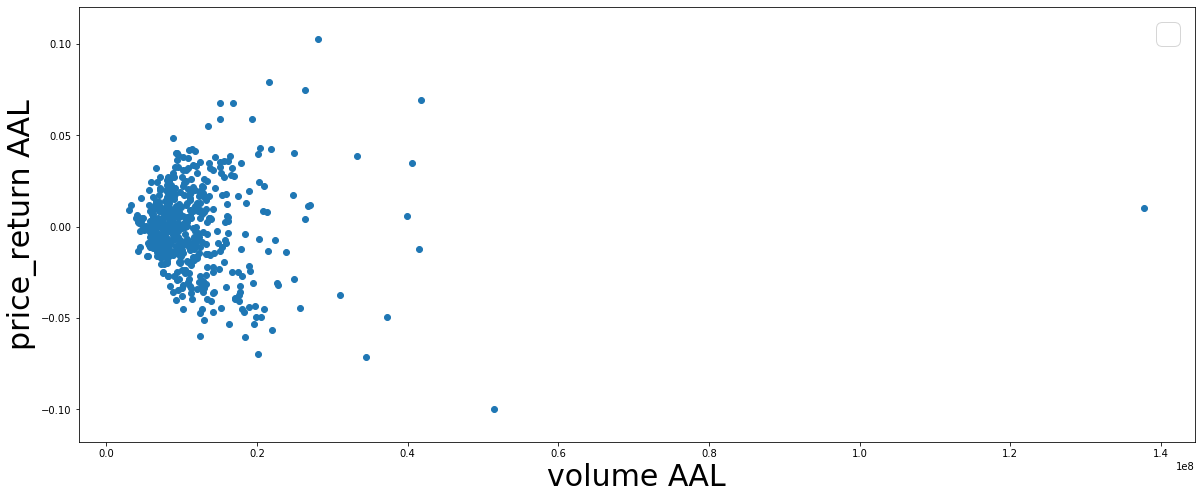

In [20]:
plt.figure(figsize=(20,8))
plt.scatter(x = volume['AAL'], y = price_return['AAL'])
plt.xlabel('volume AAL', fontsize=30)
plt.ylabel('price_return AAL', fontsize=30)
plt.legend(fontsize = 30)

No handles with labels found to put in legend.


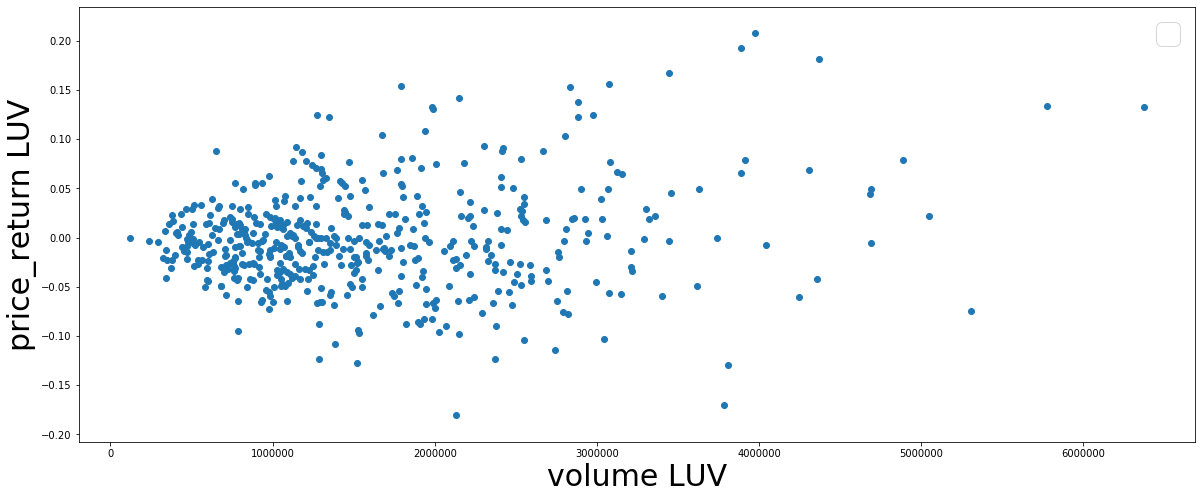

In [21]:
# Plot raw data
plt.figure(figsize=(20,8))
plt.scatter(y = price_return['LUV'], x = volume['LUV'])
plt.xlabel('volume LUV', fontsize=30)
plt.ylabel('price_return LUV', fontsize=30)
plt.legend(fontsize = 30)

-0.04355046814488288
-0.1171306479156803
0.23363743364243353
0.08304551401495525
0.0710902944506596
0.12838750107179492
-0.1949985857613913
-0.13255629901219024
0.25731689998709545
-0.004889373781082505
-0.03389900622872177
0.16620580178643768
0.16641683692614442


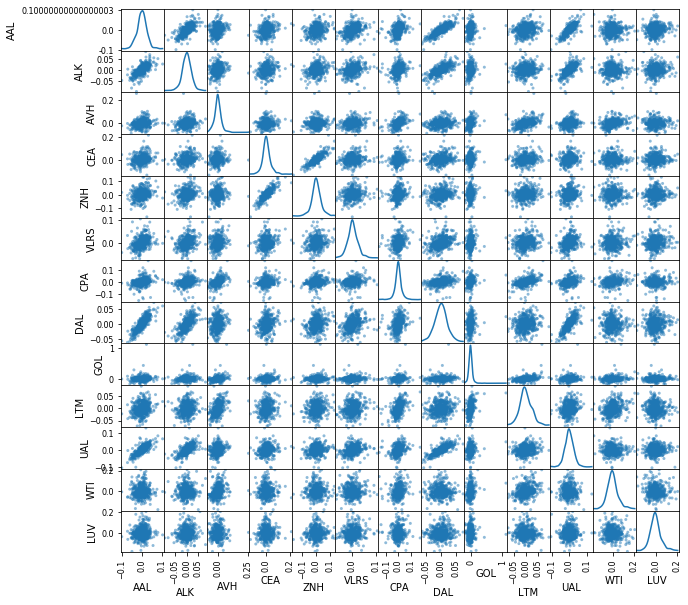

In [22]:
for x in ['AAL','ALK','AVH','CEA','ZNH','VLRS','CPA','DAL','GOL','LTM','UAL','WTI','LUV']:
    print(volume[x].corr(price_return[x]))
    
pd.plotting.scatter_matrix(price_return, diagonal='kde', figsize=(10, 10));    

In [23]:
for key,value in all_data.items():
    all_data[key]['MovingAverage'] = all_data[key]['Close'].rolling(5).mean()
all_data['LUV']

,Open,High,Low,Close,Volume,Adj Close,MovingAverage
Date,,,,,,,
2014-06-02,14.78,15.09,14.76,14.98,837400,14.711601,NaN
2014-06-03,14.98,15.04,14.67,14.74,811600,14.475902,NaN
2014-06-04,14.81,14.91,14.49,14.52,632100,14.259844,NaN
2014-06-05,14.55,14.75,14.49,14.55,828100,14.289306,NaN
2014-06-06,14.58,14.64,14.42,14.60,792200,14.338411,14.678
...,...,...,...,...,...,...,...
2016-06-07,2.19,2.23,2.11,2.17,877900,2.170000,2.128
2016-06-08,2.20,2.20,2.11,2.16,839800,2.160000,2.128
2016-06-09,2.19,2.20,2.11,2.11,1590500,2.110000,2.136


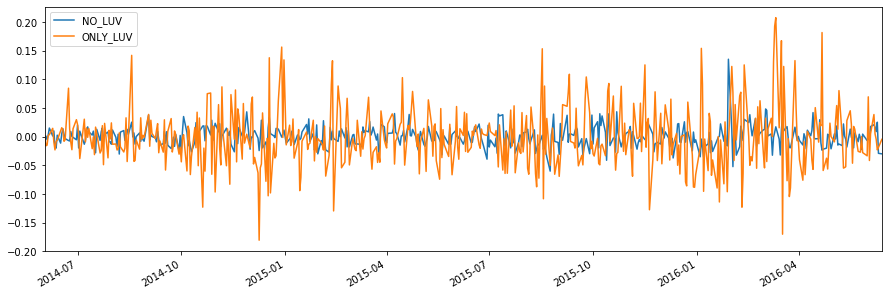

In [24]:
#price_return.drop('WTI', axis=1, inplace=True)
noluv=pd.DataFrame({'Mean of daily return':price_return[price_return.columns.difference(['LUV','WTI'])]
.mean(axis=1)},index=[i for i in all_data['AAL'].index])
onlyluv=pd.DataFrame({'Daily_Return_LUV':[i for i in price_return['LUV']]},index=[i for i in all_data['AAL'].index])
tt=pd.DataFrame({'NO_LUV':noluv['Mean of daily return'],'ONLY_LUV':onlyluv['Daily_Return_LUV']},index=[i for i in all_data['AAL'].index])
tt
tt.plot()

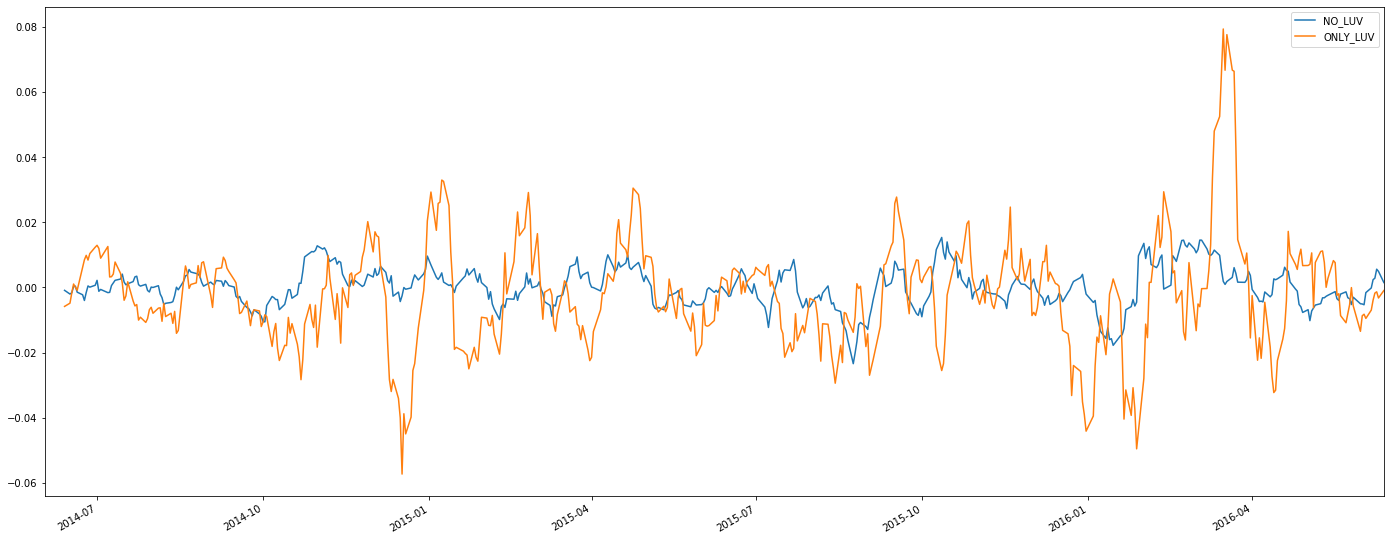

In [25]:
matplotlib.rcParams['figure.figsize'] = (24, 10)
tt.rolling(10).mean().plot()

Text(0, 0.5, 'RISK')

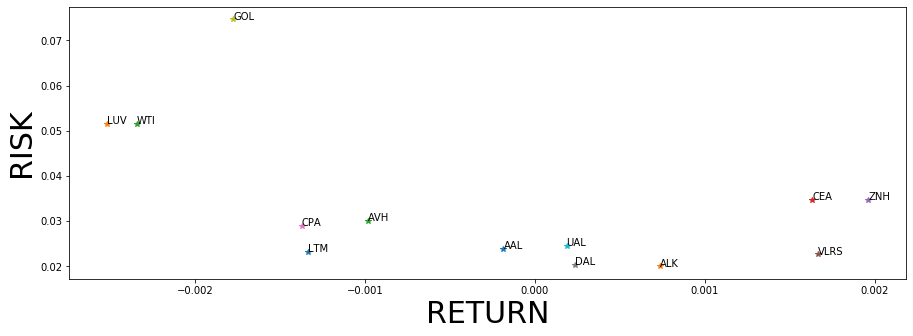

In [26]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
for column in ['AAL','ALK','AVH','CEA','ZNH','VLRS','CPA','DAL','GOL','UAL','LTM','LUV','WTI']:    
    plt.plot([price_return[column].mean()],[price_return[column].std()],'*')
    plt.text(price_return[column].mean(),price_return[column].std(),column)
    
plt.xlabel('RETURN', fontsize=30)
plt.ylabel('RISK', fontsize=30)  

Text(0, 0.5, 'AVG OF daily return of whole airline industry')

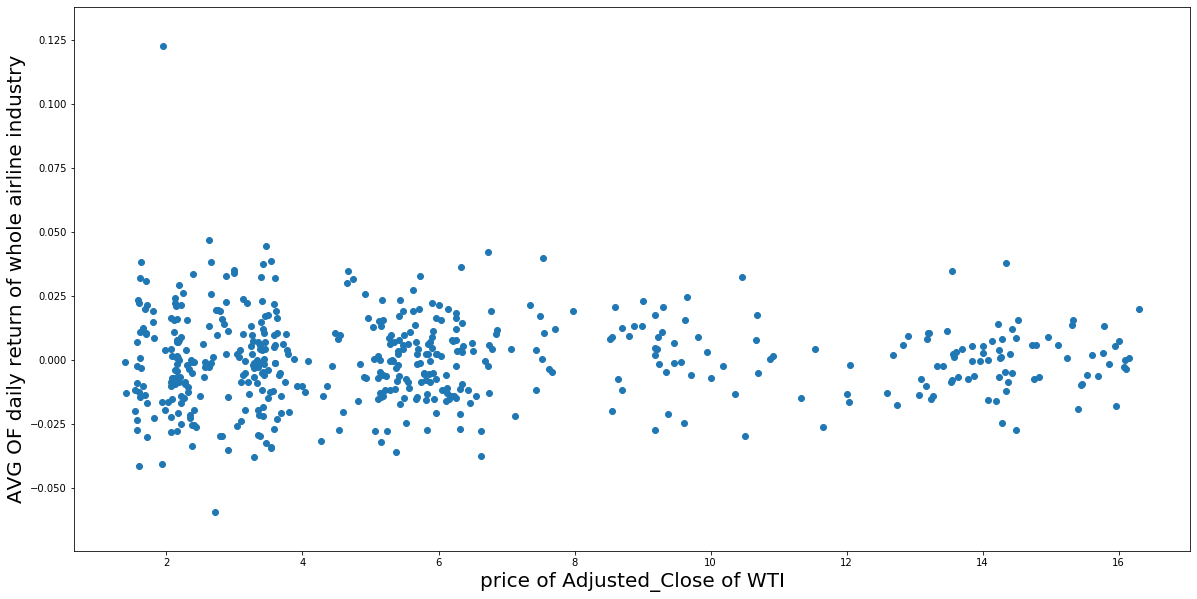

In [27]:
noWTI=pd.DataFrame({'Mean_of_daily_return':price_return[price_return.columns.difference(['WTI'])]
.mean(axis=1)},index=[i for i in all_data['AAL'].index])
plt.figure(figsize=(20,10))
plt.scatter(x =all_data['WTI']['Adj Close'] , y =noWTI)
plt.xlabel('price of Adjusted_Close of WTI', fontsize=20)
plt.ylabel('AVG OF daily return of whole airline industry', fontsize=20)

Text(0, 0.5, 'AVG OF daily return of whole airline industry')

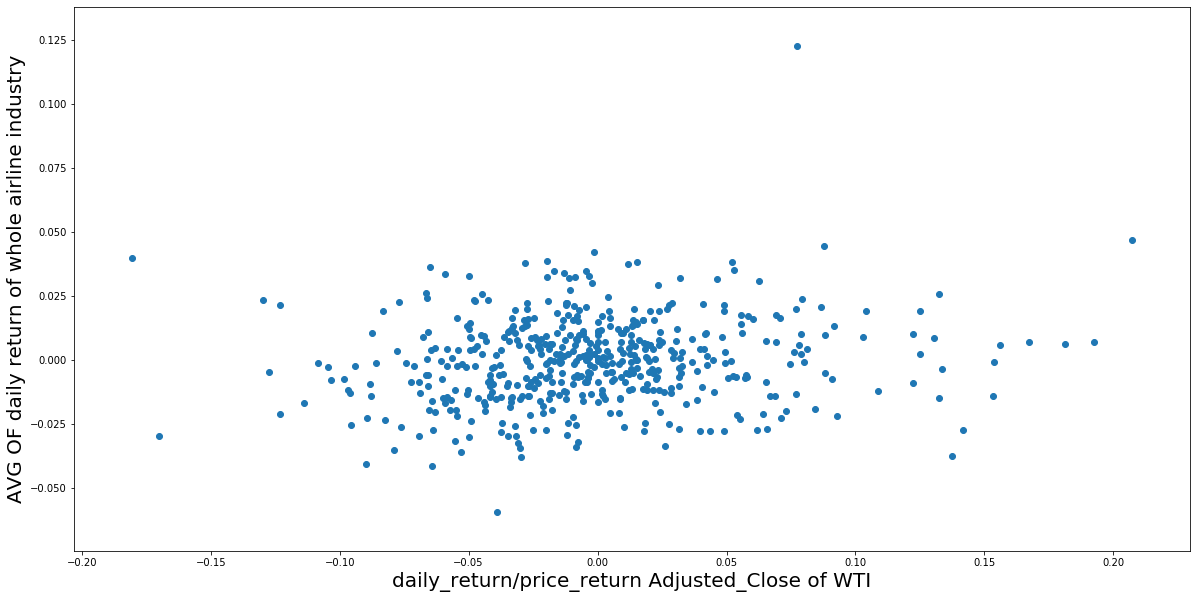

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(x = price_return['WTI'], y =noWTI)
plt.xlabel('daily_return/price_return Adjusted_Close of WTI', fontsize=20)
plt.ylabel('AVG OF daily return of whole airline industry', fontsize=20)

In [29]:
df=pd.concat([all_data['WTI']['Adj Close'],noWTI],axis=1)
df.rename(columns = {'Adj Close':'adj_close'}, inplace = True) 
lm=smf.ols(formula='Mean_of_daily_return ~ adj_close',data=df).fit()
print(lm.summary())
print(lm.params[0])

                             OLS Regression Results                             
Dep. Variable:     Mean_of_daily_return   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.1144
Date:                  Wed, 01 Jan 2020   Prob (F-statistic):              0.735
Time:                          17:28:53   Log-Likelihood:                 1361.8
No. Observations:                   513   AIC:                            -2720.
Df Residuals:                       511   BIC:                            -2711.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.001

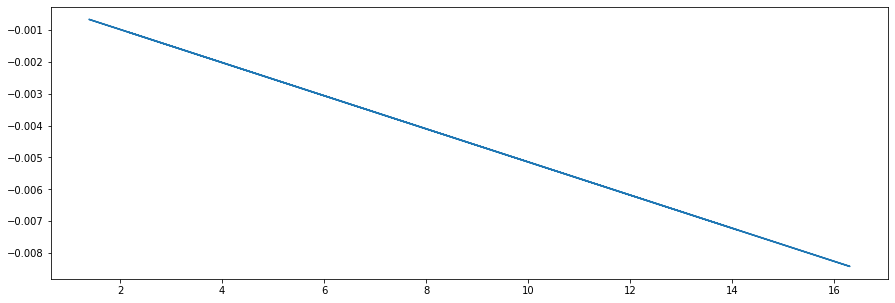

In [30]:
plt.plot(df.adj_close,df.adj_close*lm.params[0] + lm.params[1])